In [1]:
import sys
sys.path.insert(1, '../../../')

import numpy as np
import pandas as pd
import math

from util.utils import read_fbin, read_bin, get_total_nvecs_fbin, get_total_dim_fbin, pytorch_cos_sim, ts, entropy
from numpy import linalg
from statistics import median
from scipy.stats import anderson

from torch import stack as torch_stack

import importlib
import pickle

config_file = 'config_bigann_small'
config = importlib.import_module(config_file)

#Where's the data
INDEX_PATH = config.INDEX_PATH
DATA_TYPE = config.DATA_TYPE
DATA_FILE = config.DATA_FILE
QUERY_FILE = config.QUERY_FILE

#See config.small.py for the config options descriptions
RANDOM_SEED = config.RANDOM_SEED
SAMPLE_SIZE = config.SAMPLE_SIZE
BATCH_SIZE = config.BATCH_SIZE
MAX_ITER = config.MAX_ITER
S = config.S

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

../data/bigann/learn.100M.u8bin sample_size=100000
Total number of dimensions in dataset: 128
Total number of points in dataset: 100000000
Maximum number of points to index: 100000
Dimension 0 distribution


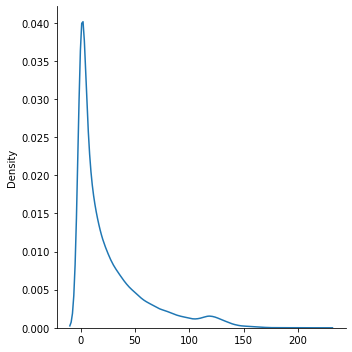

Dimension 1 distribution


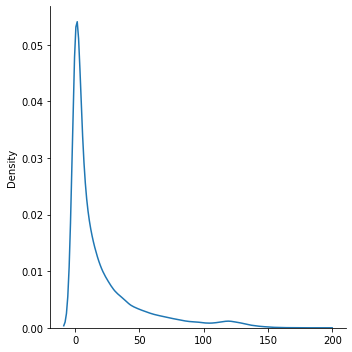

Dimension 2 distribution


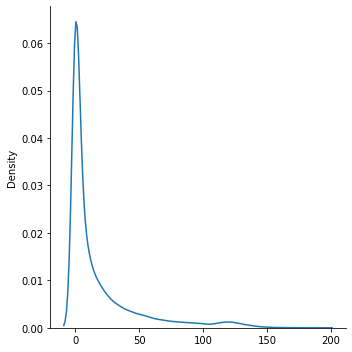

Dimension 3 distribution


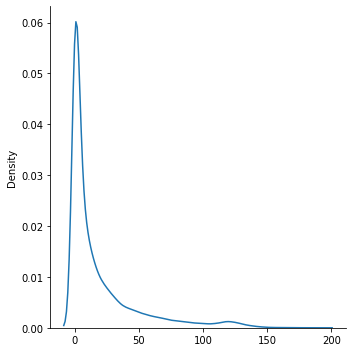

Dimension 4 distribution


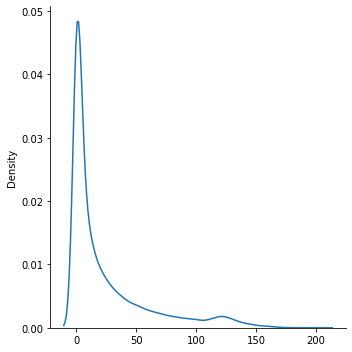

Dimension 5 distribution


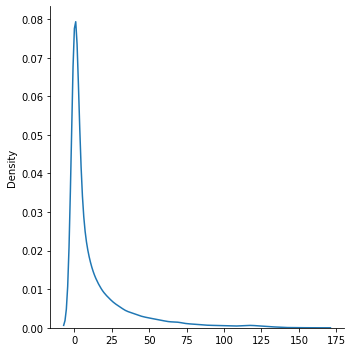

Dimension 6 distribution


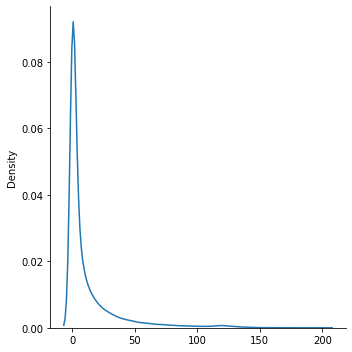

Dimension 7 distribution


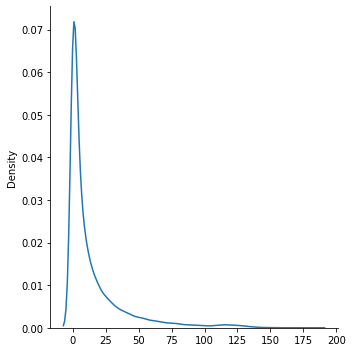

Dimension 8 distribution


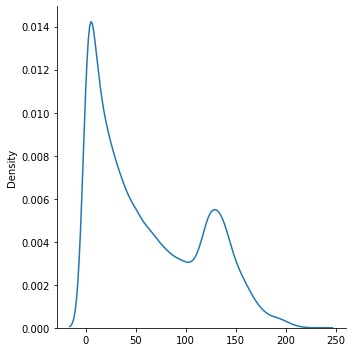

Dimension 9 distribution


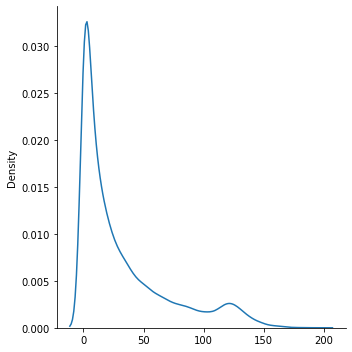

Dimension 10 distribution


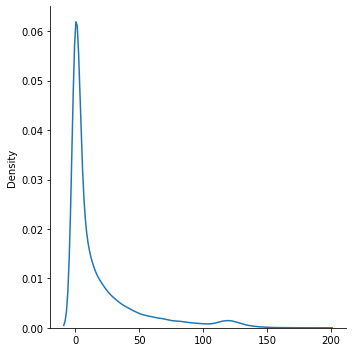

Dimension 11 distribution


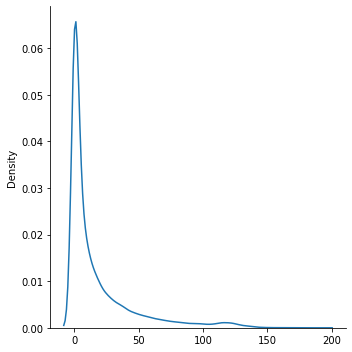

Dimension 12 distribution


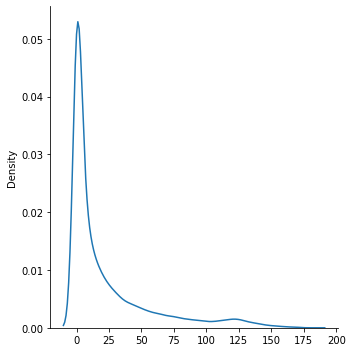

Dimension 13 distribution


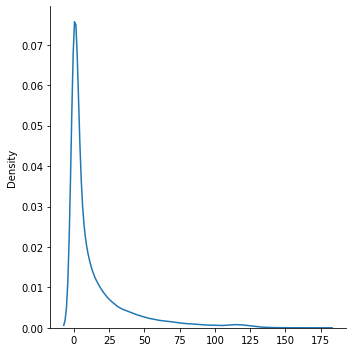

Dimension 14 distribution


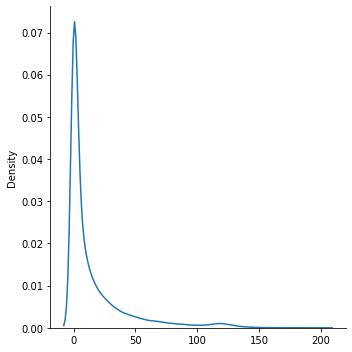

Dimension 15 distribution


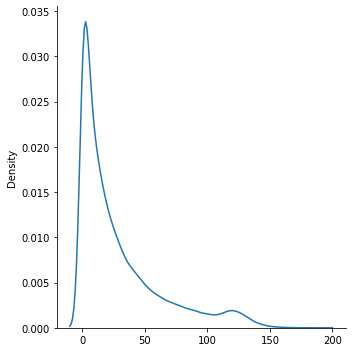

Dimension 16 distribution


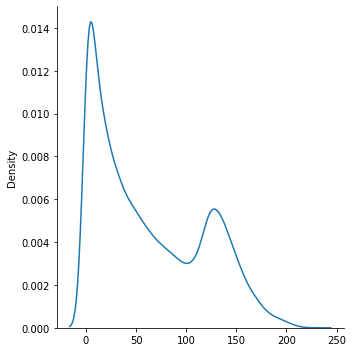

Dimension 17 distribution


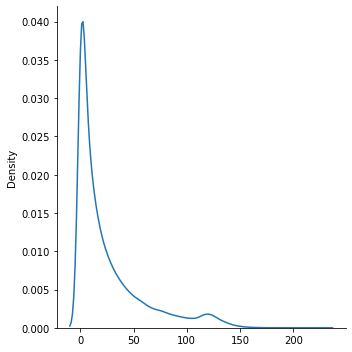

Dimension 18 distribution


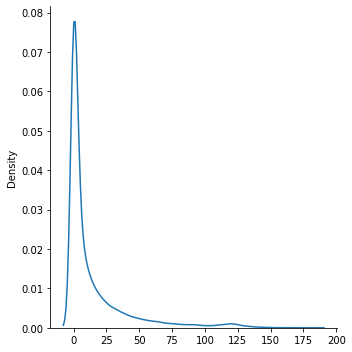

Dimension 19 distribution


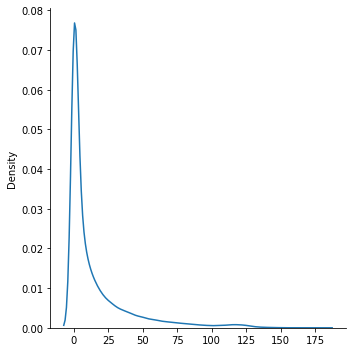

Dimension 20 distribution


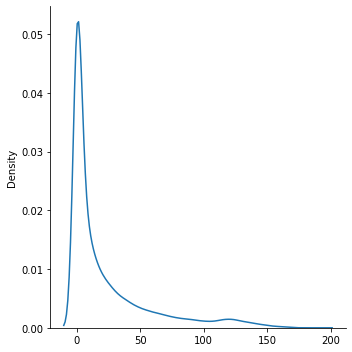

Dimension 21 distribution


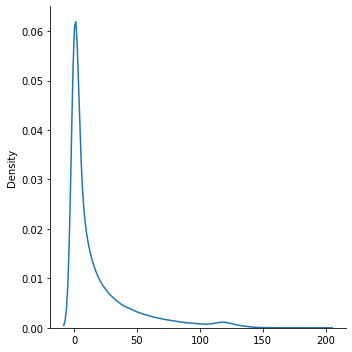

Dimension 22 distribution


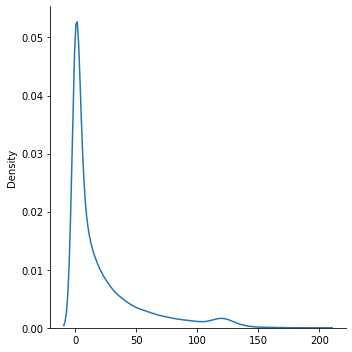

Dimension 23 distribution


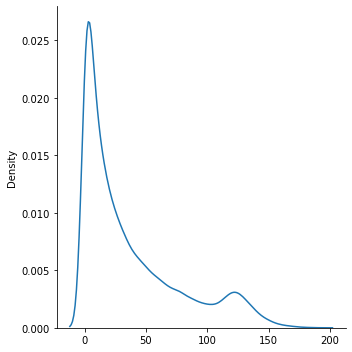

Dimension 24 distribution


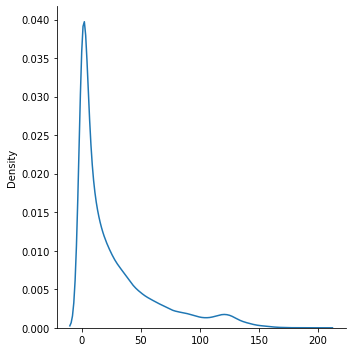

Dimension 25 distribution


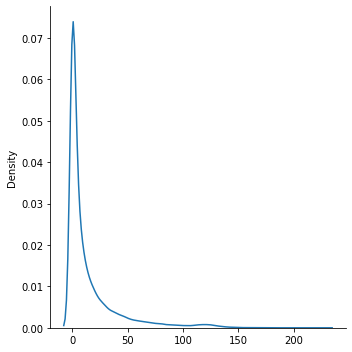

Dimension 26 distribution


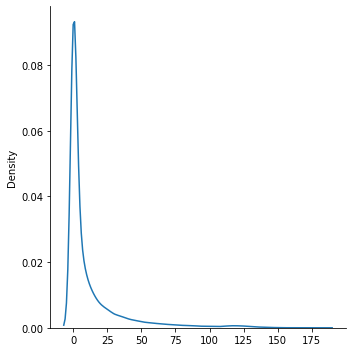

Dimension 27 distribution


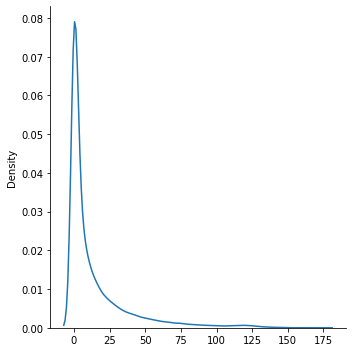

Dimension 28 distribution


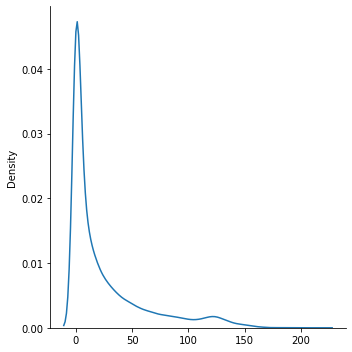

Dimension 29 distribution


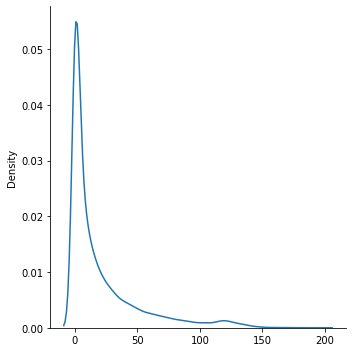

Dimension 30 distribution


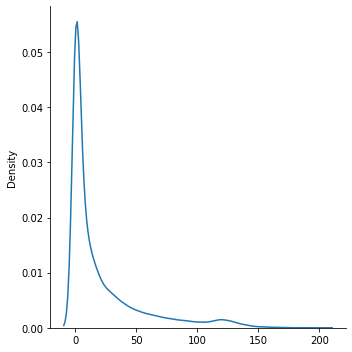

Dimension 31 distribution


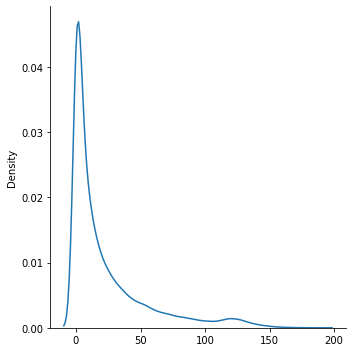

Dimension 32 distribution


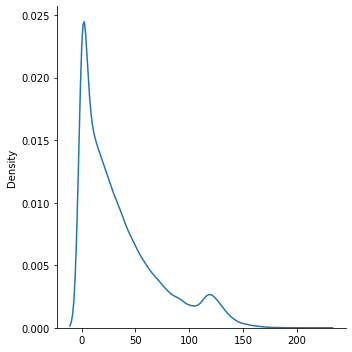

Dimension 33 distribution


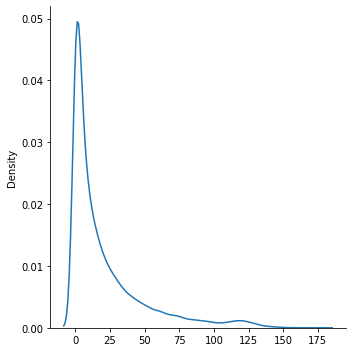

Dimension 34 distribution


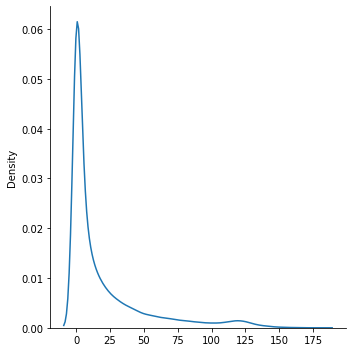

Dimension 35 distribution


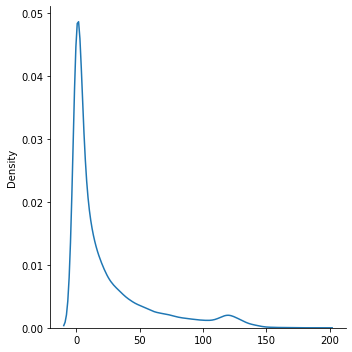

Dimension 36 distribution


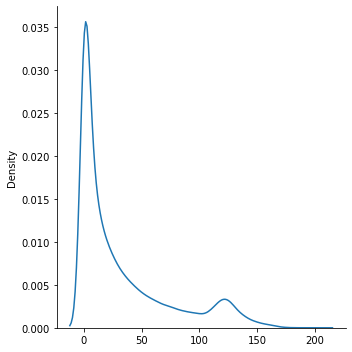

Dimension 37 distribution


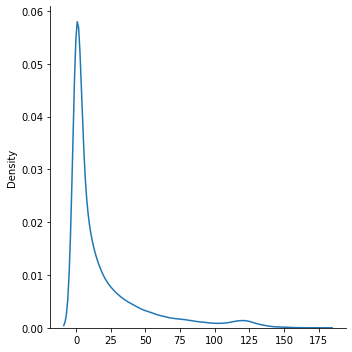

Dimension 38 distribution


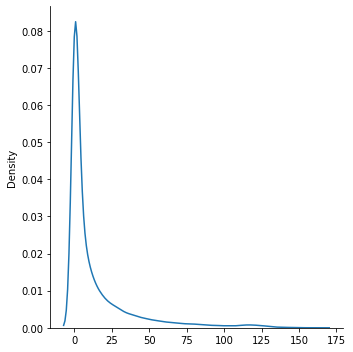

Dimension 39 distribution


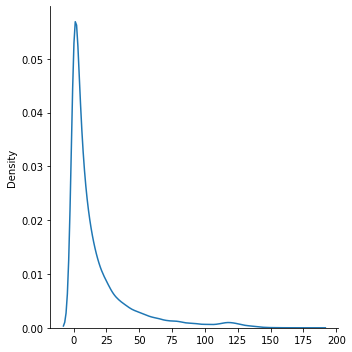

Dimension 40 distribution


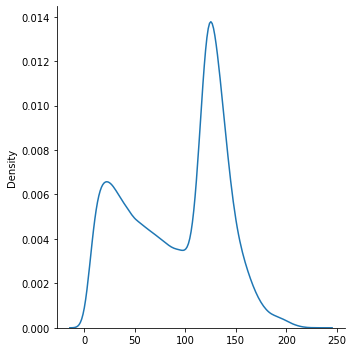

Dimension 41 distribution


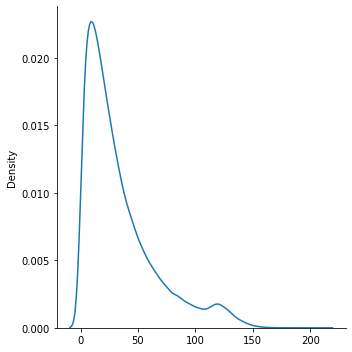

Dimension 42 distribution


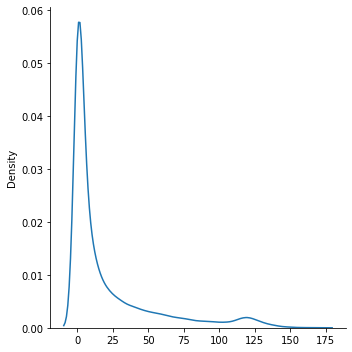

Dimension 43 distribution


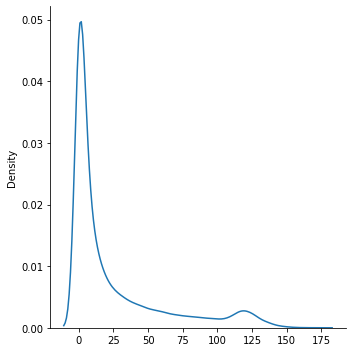

Dimension 44 distribution


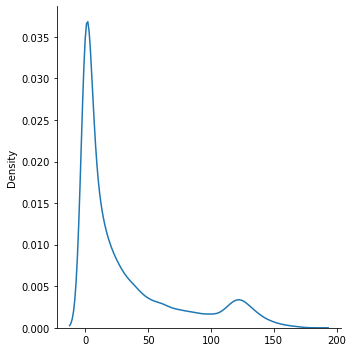

Dimension 45 distribution


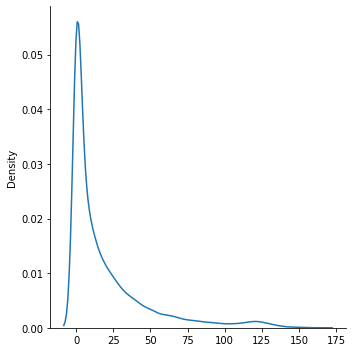

Dimension 46 distribution


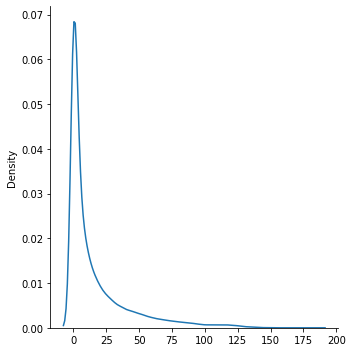

Dimension 47 distribution


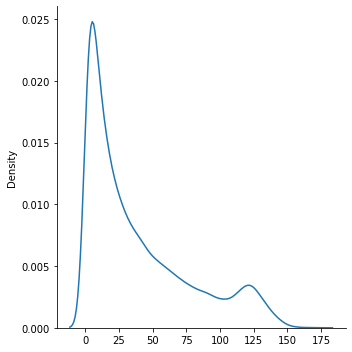

Dimension 48 distribution


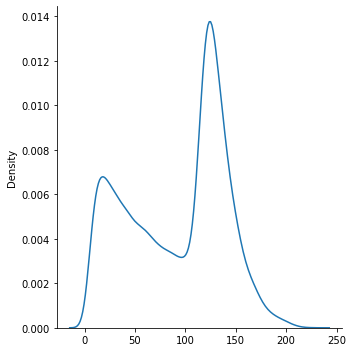

Dimension 49 distribution


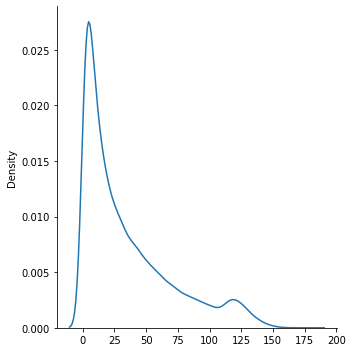

Dimension 50 distribution


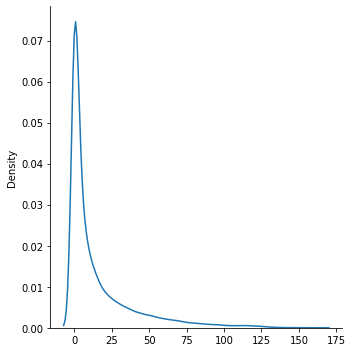

Dimension 51 distribution


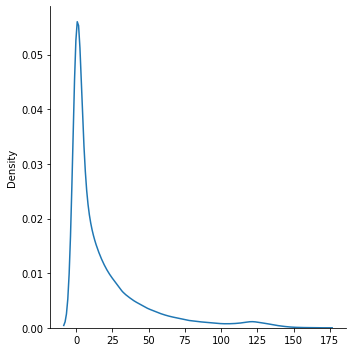

Dimension 52 distribution


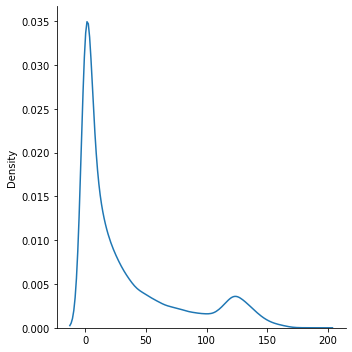

Dimension 53 distribution


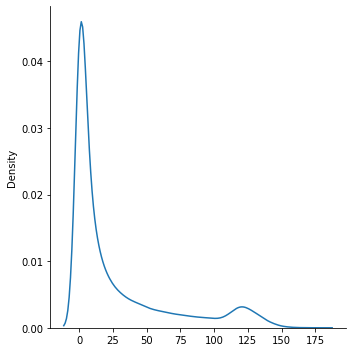

Dimension 54 distribution


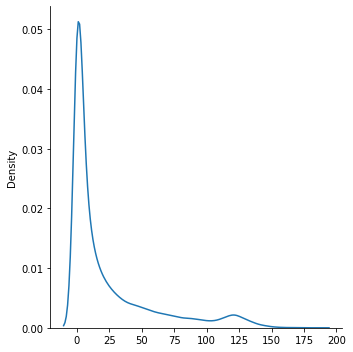

Dimension 55 distribution


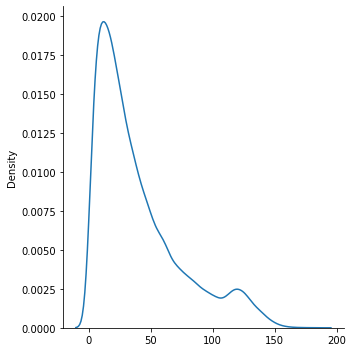

Dimension 56 distribution


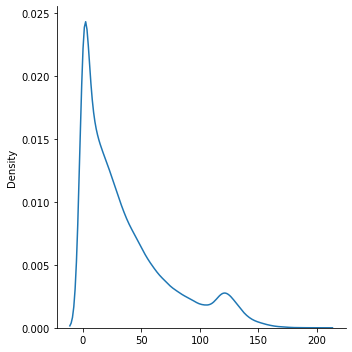

Dimension 57 distribution


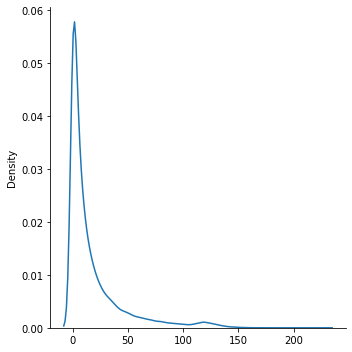

Dimension 58 distribution


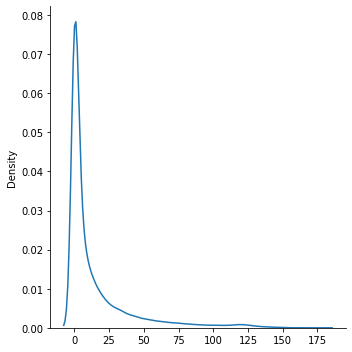

Dimension 59 distribution


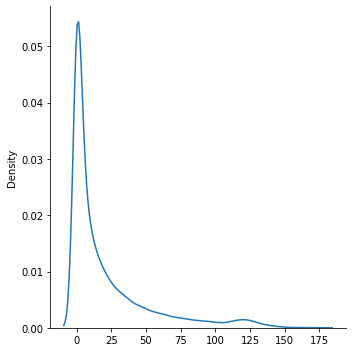

Dimension 60 distribution


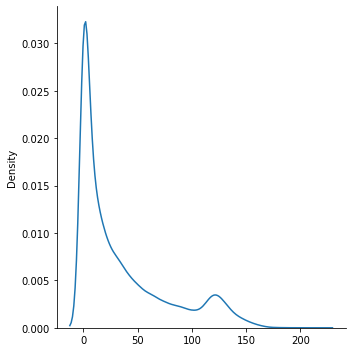

Dimension 61 distribution


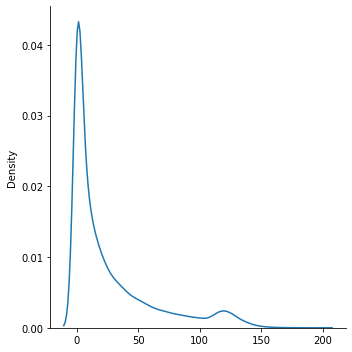

Dimension 62 distribution


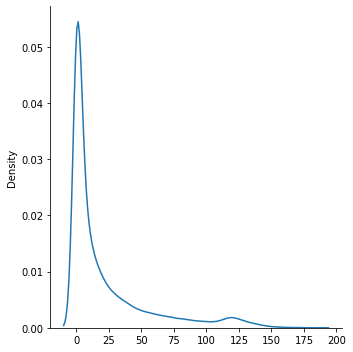

Dimension 63 distribution


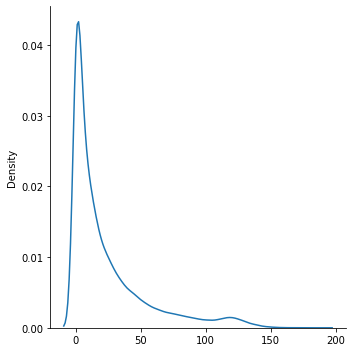

Dimension 64 distribution


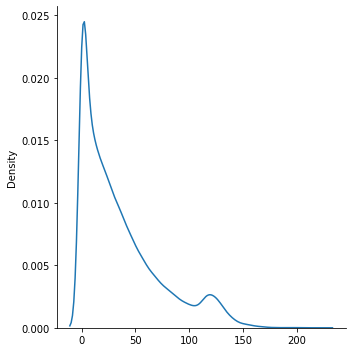

Dimension 65 distribution


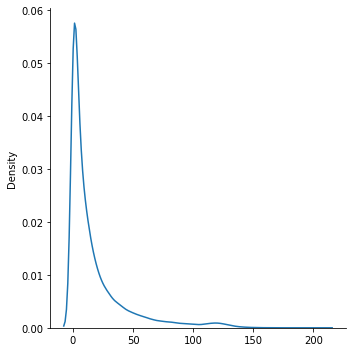

Dimension 66 distribution


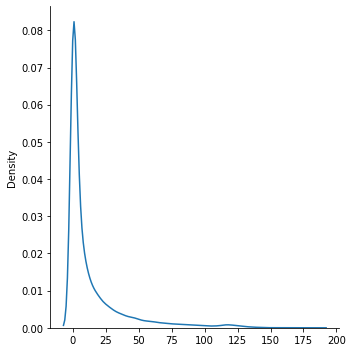

Dimension 67 distribution


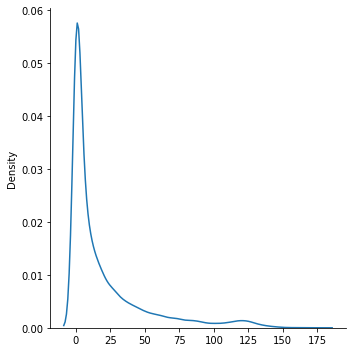

Dimension 68 distribution


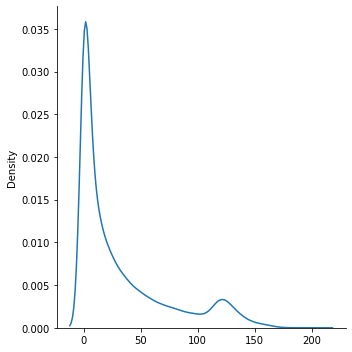

Dimension 69 distribution


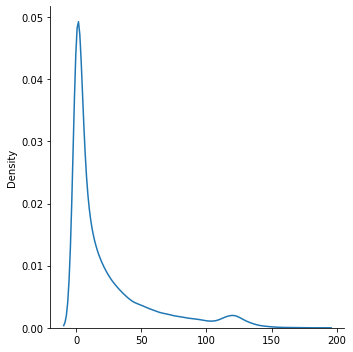

Dimension 70 distribution


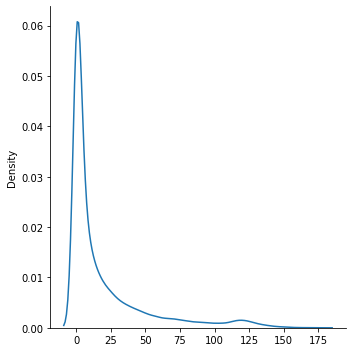

Dimension 71 distribution


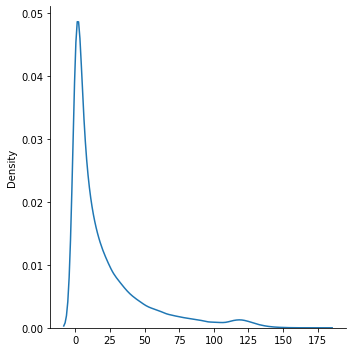

Dimension 72 distribution


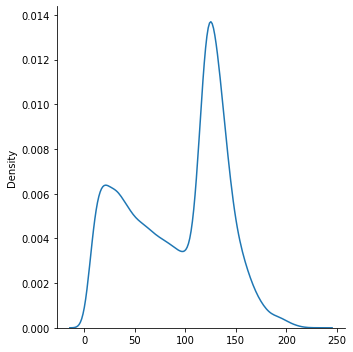

Dimension 73 distribution


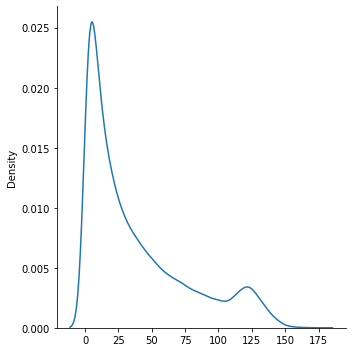

Dimension 74 distribution


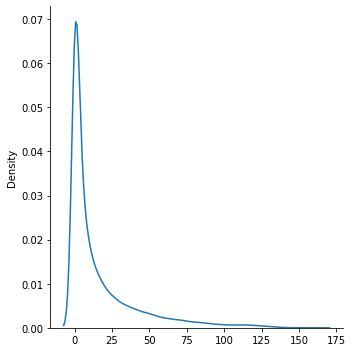

Dimension 75 distribution


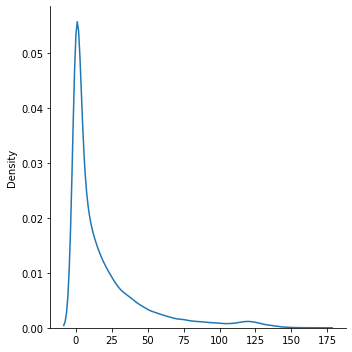

Dimension 76 distribution


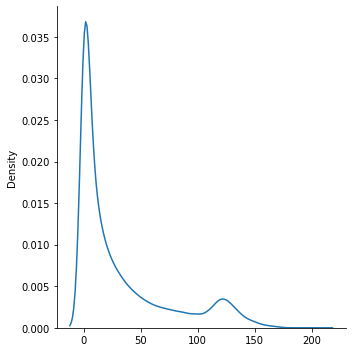

Dimension 77 distribution


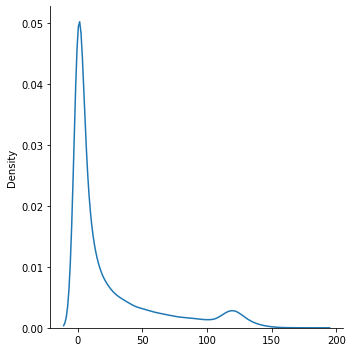

Dimension 78 distribution


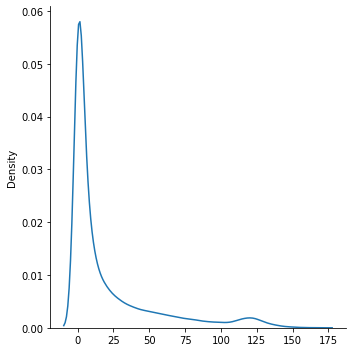

Dimension 79 distribution


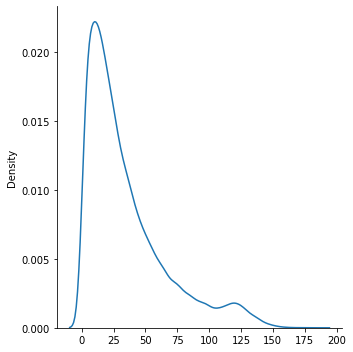

Dimension 80 distribution


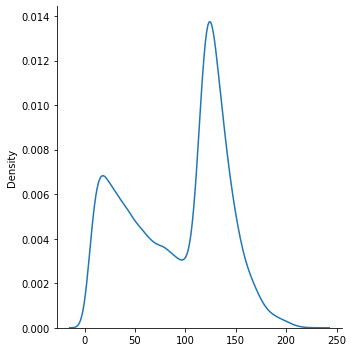

Dimension 81 distribution


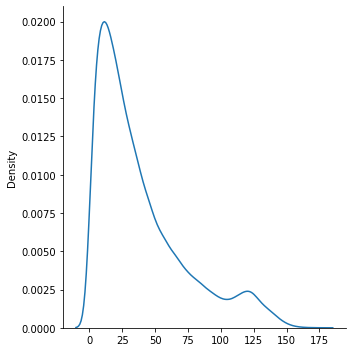

Dimension 82 distribution


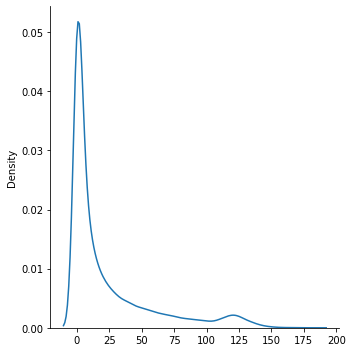

Dimension 83 distribution


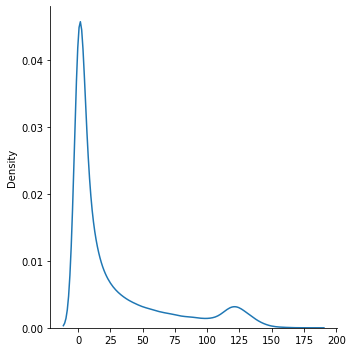

Dimension 84 distribution


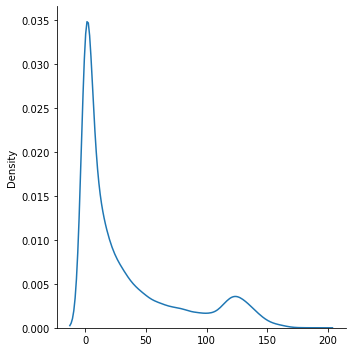

Dimension 85 distribution


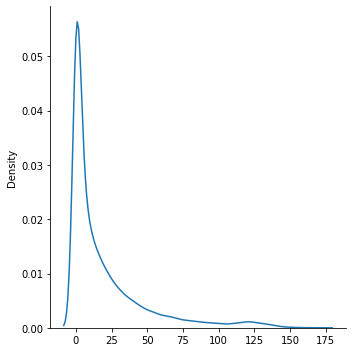

Dimension 86 distribution


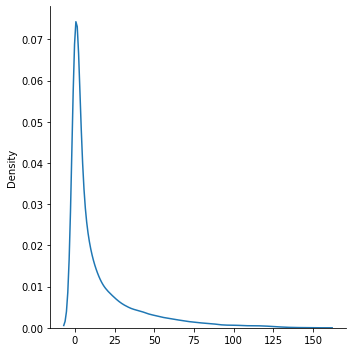

Dimension 87 distribution


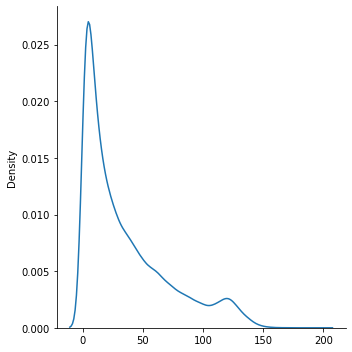

Dimension 88 distribution


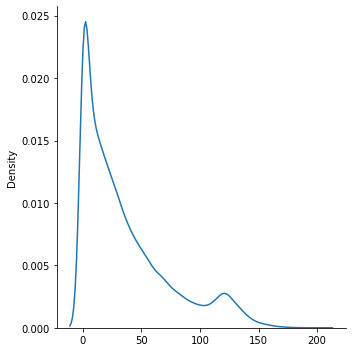

Dimension 89 distribution


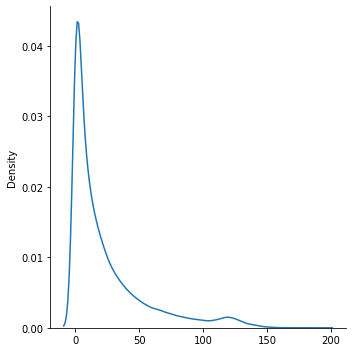

Dimension 90 distribution


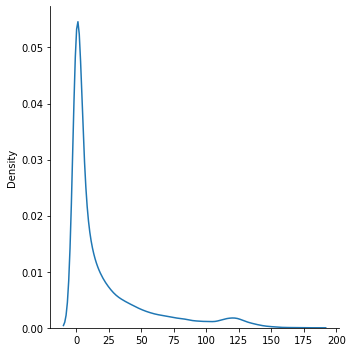

Dimension 91 distribution


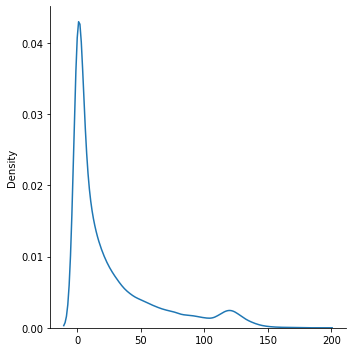

Dimension 92 distribution


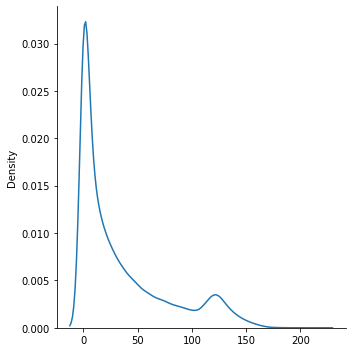

Dimension 93 distribution


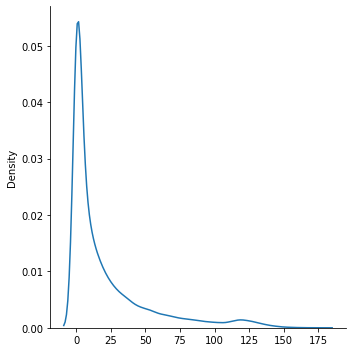

Dimension 94 distribution


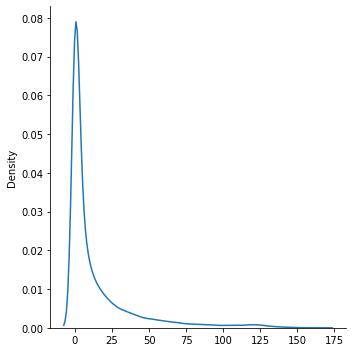

Dimension 95 distribution


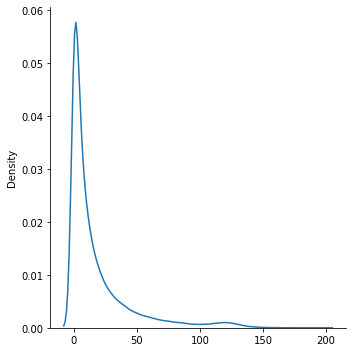

Dimension 96 distribution


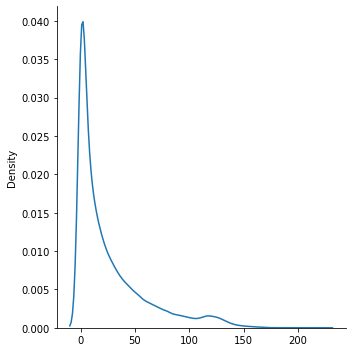

Dimension 97 distribution


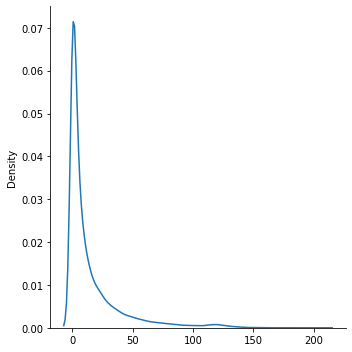

Dimension 98 distribution


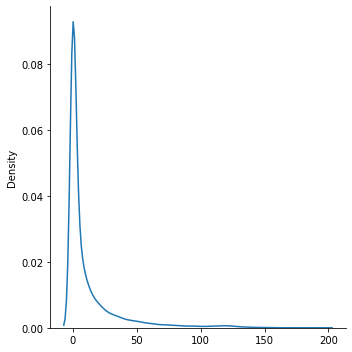

Dimension 99 distribution


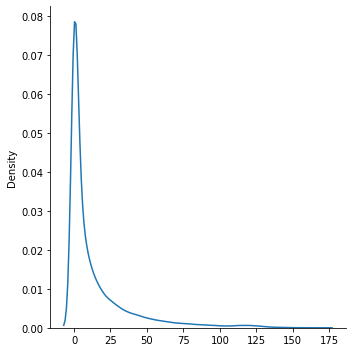

Dimension 100 distribution


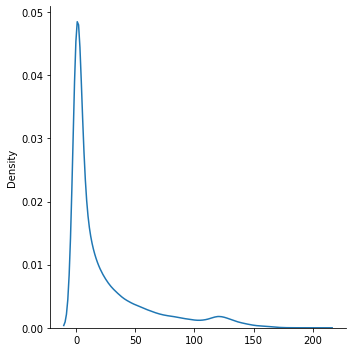

Dimension 101 distribution


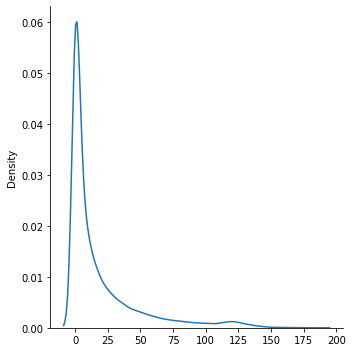

Dimension 102 distribution


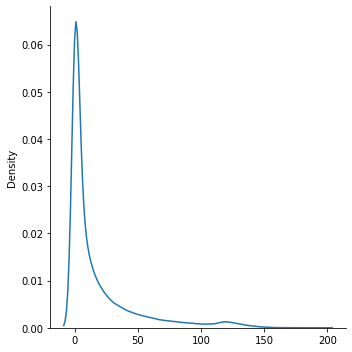

Dimension 103 distribution


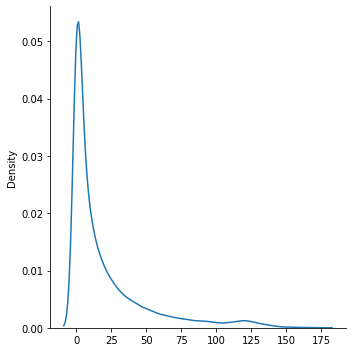

Dimension 104 distribution


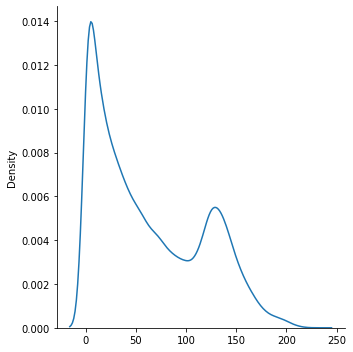

Dimension 105 distribution


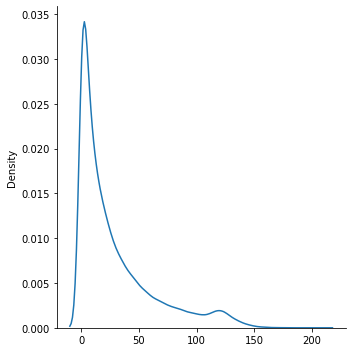

Dimension 106 distribution


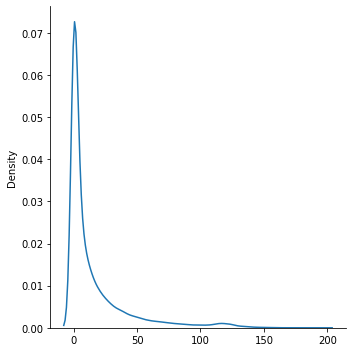

Dimension 107 distribution


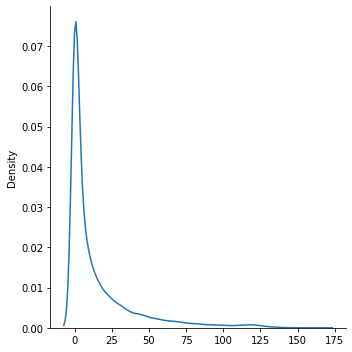

Dimension 108 distribution


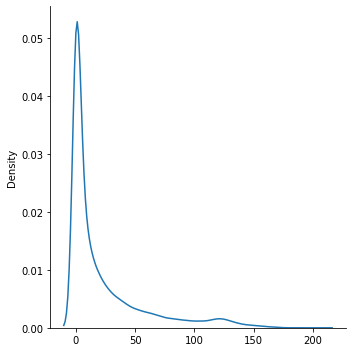

Dimension 109 distribution


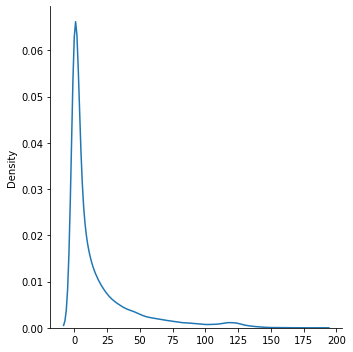

Dimension 110 distribution


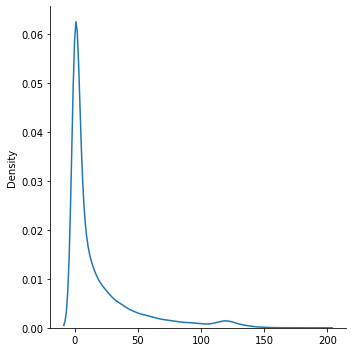

Dimension 111 distribution


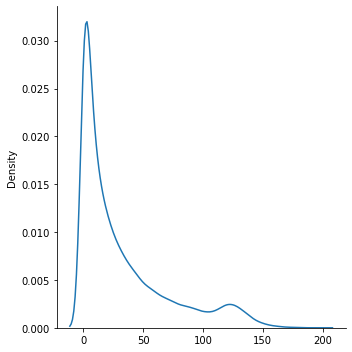

Dimension 112 distribution


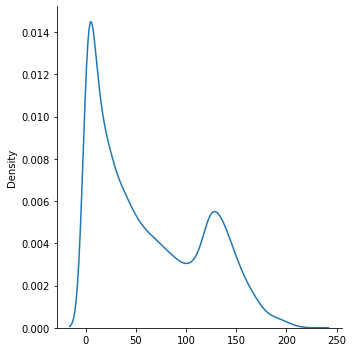

Dimension 113 distribution


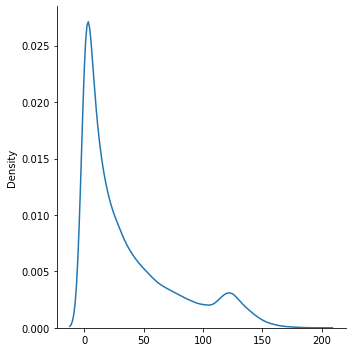

Dimension 114 distribution


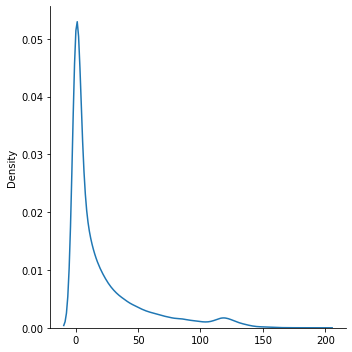

Dimension 115 distribution


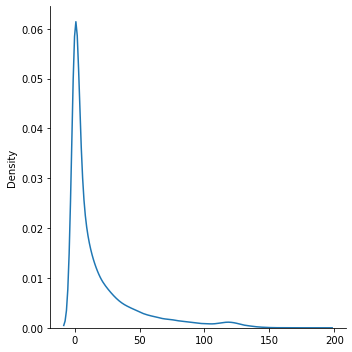

Dimension 116 distribution


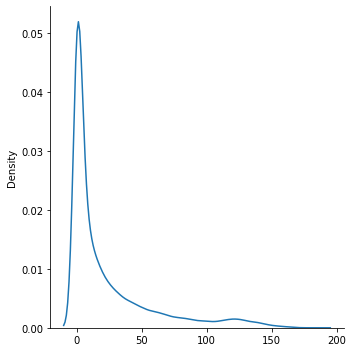

Dimension 117 distribution


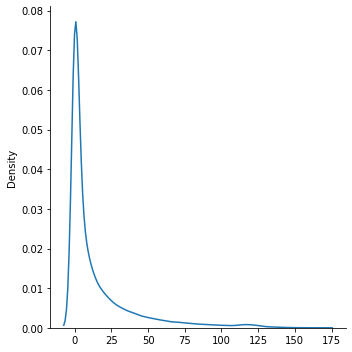

Dimension 118 distribution


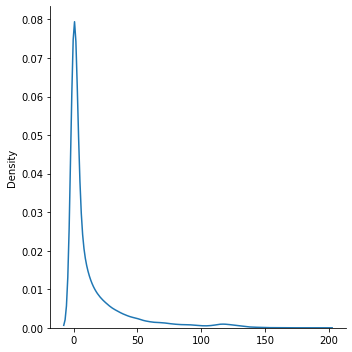

Dimension 119 distribution


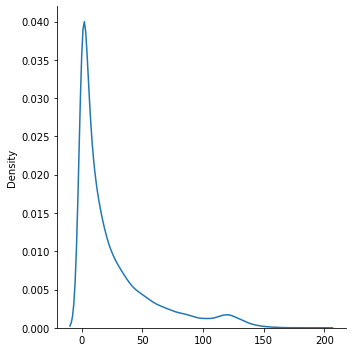

Dimension 120 distribution


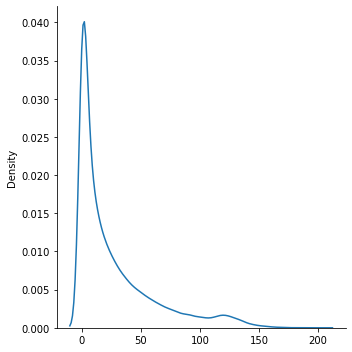

Dimension 121 distribution


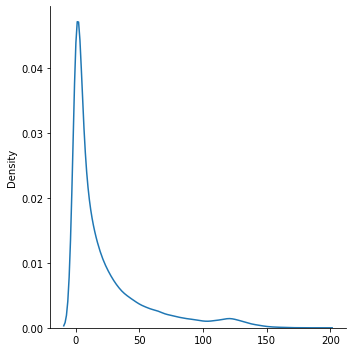

Dimension 122 distribution


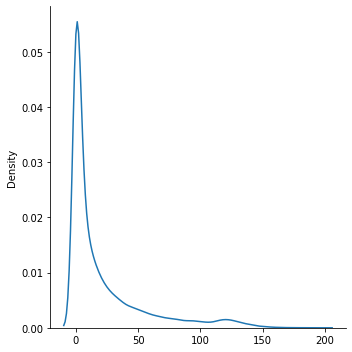

Dimension 123 distribution


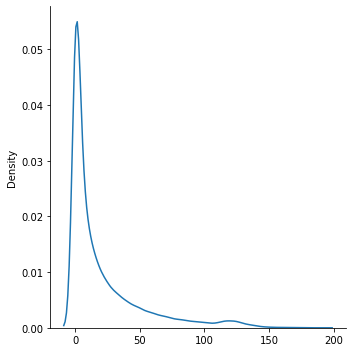

Dimension 124 distribution


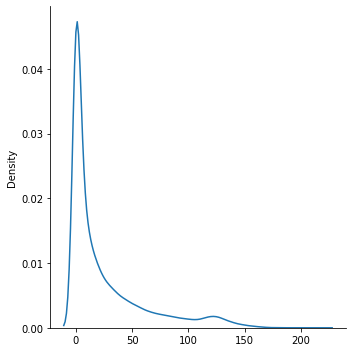

Dimension 125 distribution


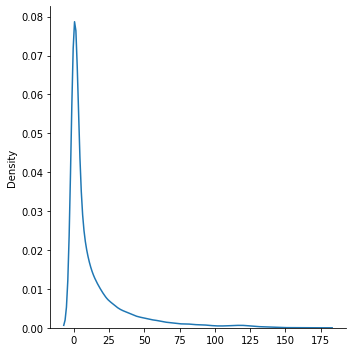

Dimension 126 distribution


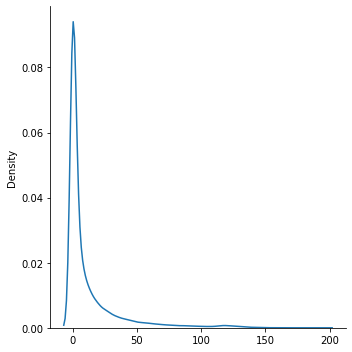

Dimension 127 distribution


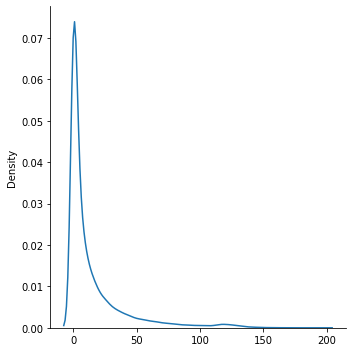

Done! 2021-09-18 09:03:55.153898


In [3]:
"""
This will get the variance and entropy for dimensions of a dataset
"""
def show_distributions(
        path, 
        data_file, 
        dtype,
        sample_size: int = SAMPLE_SIZE
    ):

    #Prepare for batch indexing
    total_num_elements = get_total_nvecs_fbin(data_file)
    total_num_dimensions = get_total_dim_fbin(data_file)
    if sample_size and sample_size<total_num_elements:
        range_upper = sample_size
    else:
        range_upper = total_num_elements

    print(f"{data_file} sample_size={sample_size}")
    print(f"Total number of dimensions in dataset: {total_num_dimensions}")
    print(f"Total number of points in dataset: {total_num_elements}")
    
    print(f"Maximum number of points to index: {range_upper}")

    dims = []
    variance = []
    entropies = []
    covariance_num = total_num_dimensions-1

    assert(sample_size<=100000)
    
    points = read_bin(data_file, dtype, start_idx=0, chunk_size=sample_size)
    sample_variance = np.var(points)

    #Load and index the datafile in batches
    for dim in range(total_num_dimensions):

        #Scalar values of a specific dimension for all points
        dim_points = points[:,dim]

        print(f'Dimension {dim} distribution')
        #sns.distplot(dim_points, hist=False)
        sns.displot(data=dim_points, kind="kde")
        plt.show()

show_distributions(INDEX_PATH,DATA_FILE,DATA_TYPE)
print(f"Done! {ts()}")